Tarea: 

1) Elegir palabras claves para construir un dataset sobre cierta(s) temática(s)

2) Construir indicadores estadísticos para describir el dataset obtenido
   - Cantidad de noticias
   - Distribución en el tiempo
   - Polaridad de las noticias
   - Organizaciones y personas más mencionadas
  
3) Proponer un método para clasificar las noticias según:
   - su(s) region(es)
   - su(s) comuna(s)

4) A partir de una muestra, evaluar el porcentaje de exactitud de su método. ¿Cuáles son las limitaciones de su método?

5) Mostrar la distribución de las noticias según su comuna y región 

In [88]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import re


df1 = pd.read_csv('./dataset_chile_latercera_2023.csv')
df2 = pd.read_csv('./dataset_2023_elciudadano.csv')
df2['text'] = df2['text'].str.replace(r'googletag\.cmd\.push\([^)]*\) \{[^}]*\}\);', '', regex=True).astype('string')
df = [df1, df2]
# Convertir la columna 'date' al tipo datetime

mandatory = "corrupcion"
palabras_clave = [
    "corrupción", "malversación", "soborno", "fraude", "colusión",
    "coludido", "coludida", "corrupto", "malversado", "asociación ilícita"
]
def calcular_relevancia(texto):
    relevancia = sum(1 for palabra in palabras_clave if palabra in texto)
    return relevancia

for _df in df:
    _df['date'] = pd.to_datetime(_df['date'], format='%b %d, %Y @ %H:%M:%S.%f')
    # Formatear la columna 'date' al formato YYYY-MM-DD
    _df['date'] = _df['date'].dt.strftime('%Y-%m-%d')
    _df["relevancia"] = _df["text"].apply(calcular_relevancia)


data = [_df[_df["relevancia"] > 0].copy() for _df in df]
data = [_df.sort_values(by="relevancia", ascending=False) for _df in data]
#data = [_df['text'] for _df in data]

#
# Función para calcular la relevancia de una fila basada en las palabras clave


# Aplicar la función calcular_relevancia a cada fila y guardar el resultado en una nueva columna "relevancia"


# Seleccionar las filas más relevantes
#data = df[df["relevancia"] > 0].copy()
#data = data["text"]
#data.sort_values(by="relevancia", ascending=False)




In [89]:
import spacy

nlp = spacy.load("es_core_news_md")

def extract_entities(text):
    doc = nlp(text)
    return [ent.text for ent in doc.ents if (ent.label_ == "PER" or ent.label_ == "ORG") and len(ent.text.split()) >= 2]


data_sample = [_df.copy for _df in data]
all_entities = []

for _df in data:
    _df["entities"] = _df["text"].apply(extract_entities)
    all_entities.append([entity for sublist in _df["entities"] for entity in sublist])





# Contar las ocurrencias de cada persona


In [87]:
all_entities



[['Universidad de Chile',
  'Gabriel Boric Font',
  'Roberto Nahum',
  'Davor Harasic',
  'Jorge Mateluna',
  'Sebastián Aylwin',
  'Branislav Marelic',
  'Roberto Nahum',
  'Davor Harasic',
  'Pío Nono',
  'La Tercera PM',
  'Alfredo Jocelyn-Holt',
  'La Tercera',
  'José Rodríguez Elizondo',
  'Carlos Alberto Délano',
  'Carlos Eugenio Lavín',
  'Pablo Ruiz-Tagle',
  'Gabriel Boric',
  'Izquierda Autónoma',
  'Jorge Matenuna',
  'Clínica de Derecho',
  'Universidad de Chile',
  'La Universidad de Chile',
  'Universidad de Chile',
  'Presidente Boric',
  'Grupo Libertad',
  'Sebastián Piñera',
  'Sebastián Piñera',
  'Mauricio Macri',
  'Mariano Rajoy',
  'Iván Duquea',
  'Vicente Fox',
  'Juan Guaidó',
  'Guillermo Lasso',
  'Mario Abdo',
  'Jorge Tuto Quiroga',
  'Felipe Calderón',
  'Miguel Ángel Rodríguez',
  'José María Aznar',
  'María Colina Machado',
  'Dante Alighieri',
  'Mauricio Macri',
  'Patricia Bullrich',
  'Juntos por el Cambio',
  'Javier Milei',
  'Bernardo Arévalo'

In [90]:
from wordcloud import WordCloud

text = [' '.join(ae) for ae in all_entities]

wordcloud = [WordCloud().generate(txt) for txt in text]

plt.figure(figsize=(100,100))
#subplot(r,c) provide the no. of rows and columns
f, axarr = plt.subplots(2,1, figsize=(200,100)) 
axarr[0].imshow(wordcloud[0])
axarr[1].imshow(wordcloud[1])

plt.axis("off")
plt.show()

<Figure size 10000x10000 with 0 Axes>

In [27]:
entity_counts = pd.Series(all_entities).value_counts()
entity_uniques = pd.Series(all_entities).unique()

entity_uniques

array(['Luis Fernando Camacho', 'Stello Cochamanidis',
       'Comité Cívico de Santa Cruz', ..., 'SE COLUDEN',
       'Amarillos y Demócratas', 'CÁMARA Queda'], dtype=object)

- Para hacer mapas:

geopandas: https://geopandas.org/en/stable/

Kepler: https://kepler.gl/


In [1]:
import geopandas as gpd

In [11]:
SHAPEFILE=r'./shape/comunas.shp' #shapefile de las regiones y comunas de Chile
# fuente: https://www.bcn.cl/siit/mapas_vectoriales

In [20]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Cargar los datos geoespaciales de las regiones de Chile
chile_regions = gpd.read_file(SHAPEFILE, encoding='utf-8')

In [21]:
chile_regions

,objectid,shape_leng,dis_elec,cir_sena,cod_comuna,codregion,st_area_sh,st_length_,Region,Comuna,Provincia,geometry
0,48,170038.624165,16,8,6204,6,9.685774e+08,206184.271675,Región del Libertador Bernardo O'Higgins,Marchigüe,Cardenal Caro,"POLYGON ((-7992818.789 -4056669.319, -7992731...."
1,29,125730.104795,15,8,6102,6,4.157446e+08,151911.576827,Región del Libertador Bernardo O'Higgins,Codegua,Cachapoal,"POLYGON ((-7831651.813 -4022443.109, -7831596...."
2,30,63026.084422,15,8,6103,6,1.448565e+08,76355.326122,Región del Libertador Bernardo O'Higgins,Coinco,Cachapoal,"POLYGON ((-7892616.357 -4060673.364, -7892621...."
3,31,89840.903562,15,8,6104,6,3.256572e+08,108874.623150,Región del Libertador Bernardo O'Higgins,Coltauco,Cachapoal,"POLYGON ((-7906457.717 -4051723.734, -7906266...."
4,78,122626.493264,23,11,9121,9,6.990727e+08,156680.410681,Región de La Araucanía,Cholchol,Cautín,"POLYGON ((-8121756.186 -4645860.295, -8121644...."
...,...,...,...,...,...,...,...,...,...,...,...,...
341,255,130240.555805,19,10,16305,16,8.751006e+08,160459.137929,Región de Ñuble,San Nicolás,Punilla,"POLYGON ((-8041950.854 -4349201.562, -8041735...."
342,253,311061.932415,19,10,16304,16,2.393007e+09,388109.613857,Región de Ñuble,San Fabián,Punilla,"POLYGON ((-7931328.549 -4363544.179, -7931320...."
343,245,159257.906431,19,10,16303,16,7.638173e+08,195593.933727,Región de Ñuble,Ñiquén,Punilla,"POLYGON ((-8026032.185 -4319505.012, -8025933...."
344,243,157467.049667,19,10,16104,16,1.044405e+09,196962.664313,Región de Ñuble,El Carmen,Ñuble,"POLYGON ((-7986315.104 -4415272.935, -7986309...."


In [24]:
import numpy as np

# Generar valores aleatorios entre 1 y 10
random_values = np.random.randint(1, 11, size=len(chile_regions))

# Añadir la columna "value" al DataFrame con los valores aleatorios
chile_regions['value'] = random_values

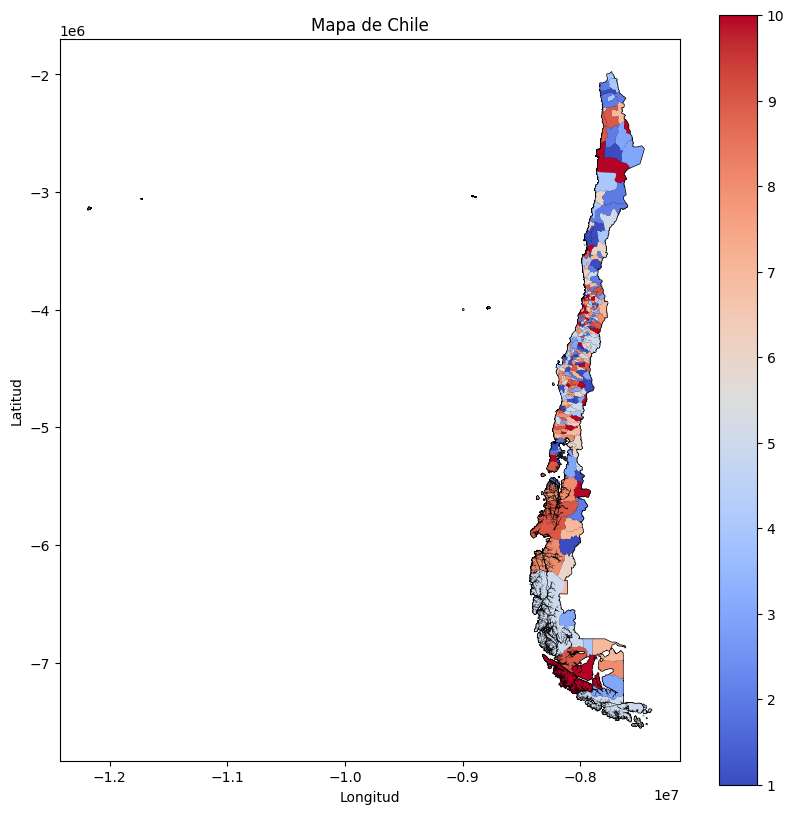

In [27]:
# Crear una figura y ejes
fig, ax = plt.subplots(figsize=(10, 10))
# Reemplaza 'variable' con el nombre de la columna de tu DataFrame que contiene la variable a visualizar
# Reemplaza 'cmap' con el mapa de colores que desees usar
# Reemplaza 'legend' con True si deseas mostrar la leyenda
# Dibujar el mapa de Chile
chile_regions.plot(ax=ax, color='lightgrey', edgecolor='black')

# Colorear las regiones según una variable específica
# Reemplaza 'variable' con el nombre de la columna de tu DataFrame que contiene la variable a visualizar
# Reemplaza 'cmap' con el mapa de colores que desees usar
# Reemplaza 'legend' con True si deseas mostrar la leyenda
# Reemplaza 'vmin' y 'vmax' con los valores mínimo y máximo de tu variable para normalizar los colores

#chile_regions.plot(ax=ax, column='variable', cmap='coolwarm', legend=True, vmin=0, vmax=100)

chile_regions.plot(ax=ax, column="value", cmap='coolwarm', legend=True, vmin=1, vmax=10)

# Añadir título y etiquetas de los ejes
plt.title('Mapa de Chile')
plt.xlabel('Longitud')
plt.ylabel('Latitud')

# Mostrar el mapa
plt.show()